In [257]:
#!/usr/bin/env python
# coding: utf-8

In[7]:

<AxesSubplot:xlabel='x', ylabel='y'>

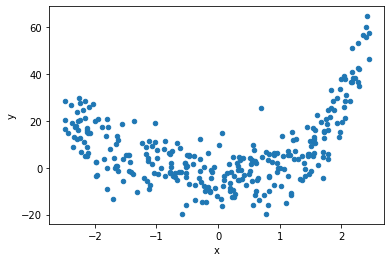

In [258]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y}) 
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df[['y']], test_size=0.2, shuffle=False)

In [260]:
df_mse_score = pd.DataFrame(None, columns = ["train_mse", "test_mse"])
df_mse_score

,train_mse,test_mse


In [261]:
regressors = []

# Linear Regression

In[73]:

In [262]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In[74]:

In [263]:
lin_reg.predict(X_test).reshape(1,-1)[0], X_test.values.reshape(1,-1)[0]

(array([ 3.77870126,  2.88212568,  5.90520715,  5.86130006,  8.01659374,
         7.8331745 , 10.65008263,  6.05287558,  7.95114611,  4.66289964,
        11.00888869,  6.82524223, 11.24677793,  4.3657681 , 10.10220443,
         9.52272081,  8.55586666,  5.92528488, 10.42733735,  2.55269694,
         3.66372746,  6.4887989 ,  5.4049398 ,  3.75197062,  9.01648041,
         9.66139919,  2.40192745,  5.34309601, 10.51457306,  3.44919499,
        10.8160885 , 10.82462397,  4.09945039, 10.03485881, 10.37373483,
         5.69284974,  8.74540923,  9.65179468,  6.50055988,  8.98656133,
         6.96595857,  9.99639999,  4.75936535,  7.05377071, 10.28804869,
         4.16439879,  9.89436568, 10.3739896 ,  7.42494846,  5.34413663,
         5.56747282,  6.61847151,  8.5822979 ,  2.37464378,  5.86446884,
         7.12312002,  2.57399931,  4.69122652, 10.60986049, 11.27336269]),
 array([-1.625624  , -2.1089579 , -0.47924838, -0.50291821,  0.65897659,
         0.56009732,  2.07866109, -0.39964198,  0

In[93]:

<AxesSubplot:xlabel='x', ylabel='y'>

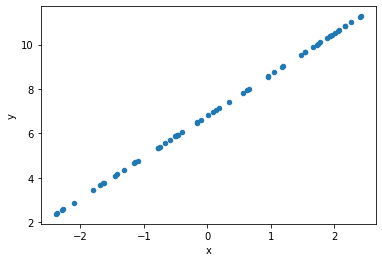

In [264]:
lin_predict_test = lin_reg.predict(X_test)
lin_predict_train = lin_reg.predict(X_train)
df2 = pd.DataFrame({'x':X_test.values.reshape(1,-1)[0], 'y':lin_predict_test.reshape(1,-1)[0]})
df2.plot.scatter(x='x',y='y')

In[95]:

In [265]:
from sklearn.metrics import mean_squared_error
test_mse_lin = mean_squared_error(y_test, lin_predict_test)
train_mse_lin = mean_squared_error(y_train, lin_predict_train)

In [266]:
test_mse_lin, train_mse_lin

(238.35154334034593, 208.5403703512533)

In [267]:
df_mse_score.loc["lin_reg", "train_mse"] = train_mse_lin
df_mse_score.loc["lin_reg", "test_mse"] = test_mse_lin
df_mse_score

,train_mse,test_mse
lin_reg,208.54037,238.351543


In [268]:
regressors.append((lin_reg, None))

# KNN 3

In[98]:

In [269]:
import sklearn.neighbors
knn_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)
knn_predict_test = knn_reg.predict(X_test)
knn_predict_train = knn_reg.predict(X_train)

In[90]:

<AxesSubplot:xlabel='x', ylabel='y'>

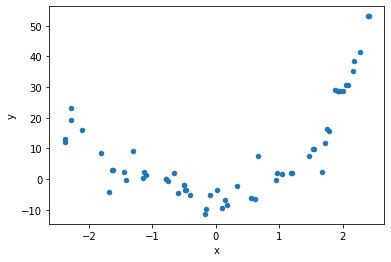

In [270]:
df3 = pd.DataFrame({'x':X_test.values.reshape(1,-1)[0], 'y':knn_predict_test.reshape(1,-1)[0]})
df3.plot.scatter(x='x',y='y')



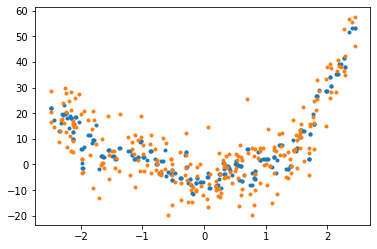

In [271]:
from matplotlib import pyplot

pyplot.plot(X_train, knn_predict_train, ".")
pyplot.plot(X_train, y_train, ".")

In[101]:

In [272]:
test_mse_knn3 = mean_squared_error(y_test, knn_predict_test)
train_mse_knn3 = mean_squared_error(y_train, knn_predict_train)

In [273]:
test_mse_knn3, train_mse_knn3

(82.20992276590778, 44.24376481265474)

In [274]:
df_mse_score.loc["knn_3_reg", "train_mse"] = train_mse_knn3
df_mse_score.loc["knn_3_reg", "test_mse"] = test_mse_knn3
df_mse_score

,train_mse,test_mse
lin_reg,208.54037,238.351543
knn_3_reg,44.243765,82.209923


In [275]:
regressors.append((knn_reg, None))


### KNN 5

In [276]:
import sklearn.neighbors
knn_reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_predict_test = knn_reg.predict(X_test)
knn_predict_train = knn_reg.predict(X_train)

In[107]:

<AxesSubplot:xlabel='x', ylabel='y'>

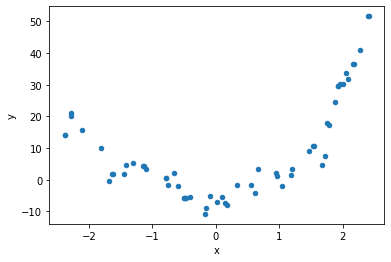

In [277]:
df4 = pd.DataFrame({'x':X_test.values.reshape(1,-1)[0], 'y':knn_predict_test.reshape(1,-1)[0]})
df4.plot.scatter(x='x',y='y')

In[108]:

In [278]:
test_mse_knn5 = mean_squared_error(y_test, knn_predict_test)
train_mse_knn5 = mean_squared_error(y_train, knn_predict_train)

In [279]:
test_mse_knn5, train_mse_knn5

(86.22688703680498, 52.006256239805346)

In [280]:
df_mse_score.loc["knn_5_reg", "train_mse"] = train_mse_knn5
df_mse_score.loc["knn_5_reg", "test_mse"] = test_mse_knn5
df_mse_score

,train_mse,test_mse
lin_reg,208.54037,238.351543
knn_3_reg,44.243765,82.209923
knn_5_reg,52.006256,86.226887


In [281]:
regressors.append((knn_reg, None))

In[109]:

# Polynomial

In[126]:

In [282]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_r_predict_test= lin_reg.predict(poly_features.fit_transform(X_test))
lin_r_predict_train = lin_reg.predict(poly_features.fit_transform(X_train))

In[117]:

<AxesSubplot:xlabel='x', ylabel='y'>

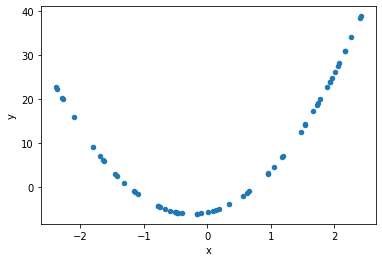

In [283]:
df5 = pd.DataFrame({'x':X_test.values.reshape(1,-1)[0], 'y':lin_r_predict_test.reshape(1,-1)[0]})
df5.plot.scatter(x='x',y='y')

In[118]:

In [284]:
test_mse_poly2 = mean_squared_error(y_test, lin_r_predict_test)
train_mse_poly2 = mean_squared_error(y_train, lin_r_predict_train)
test_mse_poly2, train_mse_poly2

(85.75209923334748, 76.78665138982133)

In [285]:
df_mse_score.loc["poly_2_reg", "train_mse"] = train_mse_poly2
df_mse_score.loc["poly_2_reg", "test_mse"] = test_mse_poly2
df_mse_score

,train_mse,test_mse
lin_reg,208.54037,238.351543
knn_3_reg,44.243765,82.209923
knn_5_reg,52.006256,86.226887
poly_2_reg,76.786651,85.752099


In [286]:
regressors.append((lin_reg, poly_features))

In [287]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_r_predict_test= lin_reg.predict(poly_features.fit_transform(X_test))
lin_r_predict_train = lin_reg.predict(poly_features.fit_transform(X_train))

<AxesSubplot:xlabel='x', ylabel='y'>

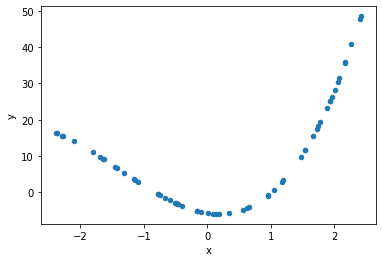

In [288]:
df5 = pd.DataFrame({'x':X_test.values.reshape(1,-1)[0], 'y':lin_r_predict_test.reshape(1,-1)[0]})
df5.plot.scatter(x='x',y='y')

In [289]:
test_mse_poly2 = mean_squared_error(y_test, lin_r_predict_test)
train_mse_poly2 = mean_squared_error(y_train, lin_r_predict_train)
test_mse_poly2, train_mse_poly2

(67.8367674429061, 64.67322506317623)

In [290]:
df_mse_score.loc["poly_3_reg", "train_mse"] = train_mse_poly2
df_mse_score.loc["poly_3_reg", "test_mse"] = test_mse_poly2
df_mse_score

,train_mse,test_mse
lin_reg,208.54037,238.351543
knn_3_reg,44.243765,82.209923
knn_5_reg,52.006256,86.226887
poly_2_reg,76.786651,85.752099
poly_3_reg,64.673225,67.836767


In [291]:
regressors.append((lin_reg, poly_features))

In [292]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4 , include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_r_predict_test= lin_reg.predict(poly_features.fit_transform(X_test))
lin_r_predict_train = lin_reg.predict(poly_features.fit_transform(X_train))

<AxesSubplot:xlabel='x', ylabel='y'>

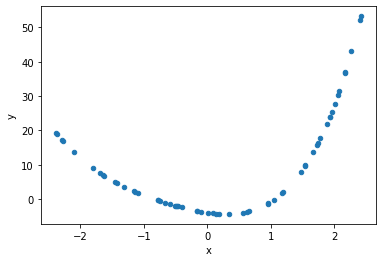

In [293]:
df5 = pd.DataFrame({'x':X_test.values.reshape(1,-1)[0], 'y':lin_r_predict_test.reshape(1,-1)[0]})
df5.plot.scatter(x='x',y='y')

In [294]:
test_mse_poly2 = mean_squared_error(y_test, lin_r_predict_test)
train_mse_poly2 = mean_squared_error(y_train, lin_r_predict_train)
test_mse_poly2, train_mse_poly2

(54.869777957370914, 62.02642259815572)

In [295]:
df_mse_score.loc["poly_4_reg", "train_mse"] = train_mse_poly2
df_mse_score.loc["poly_4_reg", "test_mse"] = test_mse_poly2
df_mse_score

,train_mse,test_mse
lin_reg,208.54037,238.351543
knn_3_reg,44.243765,82.209923
knn_5_reg,52.006256,86.226887
poly_2_reg,76.786651,85.752099
poly_3_reg,64.673225,67.836767
poly_4_reg,62.026423,54.869778


In [296]:
regressors.append((lin_reg, poly_features))

In [297]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_r_predict_test= lin_reg.predict(poly_features.fit_transform(X_test))
lin_r_predict_train = lin_reg.predict(poly_features.fit_transform(X_train))

<AxesSubplot:xlabel='x', ylabel='y'>

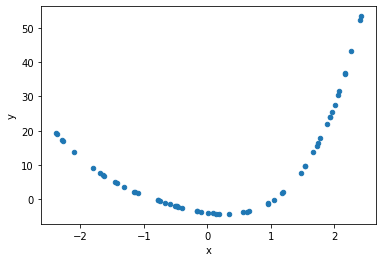

In [298]:
df5 = pd.DataFrame({'x':X_test.values.reshape(1,-1)[0], 'y':lin_r_predict_test.reshape(1,-1)[0]})
df5.plot.scatter(x='x',y='y')

In [299]:
test_mse_poly2 = mean_squared_error(y_test, lin_r_predict_test)
train_mse_poly2 = mean_squared_error(y_train, lin_r_predict_train)
test_mse_poly2, train_mse_poly2

(54.76864082514066, 62.02331874332522)

In [300]:
df_mse_score.loc["poly_5_reg", "train_mse"] = train_mse_poly2
df_mse_score.loc["poly_5_reg", "test_mse"] = test_mse_poly2
df_mse_score

,train_mse,test_mse
lin_reg,208.54037,238.351543
knn_3_reg,44.243765,82.209923
knn_5_reg,52.006256,86.226887
poly_2_reg,76.786651,85.752099
poly_3_reg,64.673225,67.836767
poly_4_reg,62.026423,54.869778
poly_5_reg,62.023319,54.768641


In [301]:
regressors.append((lin_reg, poly_features))

In [302]:
import pickle
pickle.dump(df_mse_score, open("mse.pkl", "wb"))

In [303]:
regressors

[(LinearRegression(), None),
 (KNeighborsRegressor(n_neighbors=3), None),
 (KNeighborsRegressor(), None),
 (LinearRegression(), PolynomialFeatures(include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)),
 (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]

In [304]:
import pickle
pickle.dump(regressors, open("reg.pkl", "wb"))